## Pan Card Tempering Detector

This project aims to detect whether a given PAN card image is tempered or not using computer vision and machine learning techniques. The goal is to develop a robust system that can accurately identify and flag suspicious PAN card images for further investigation.


### Importing the necessary libraries


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import imutils
import requests

In [16]:
# Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw) 

### show the format and size of the images

In [17]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


### convert the size of the images to be similar and the format also

In [18]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save("D:\Pan Card Tempering Detector App\PAN_Card_Tempering_Detector\images\original.png")#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save("D:\Pan Card Tempering Detector App\PAN_Card_Tempering_Detector\images\/tampered.png")#Saves image

(250, 160)
(250, 160)


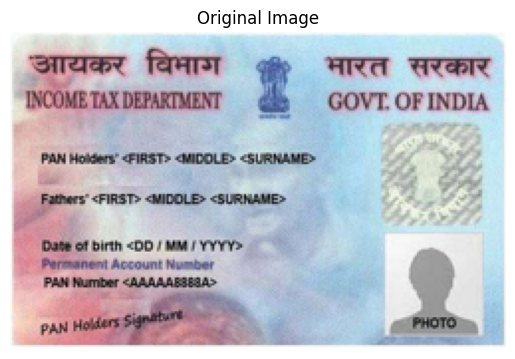

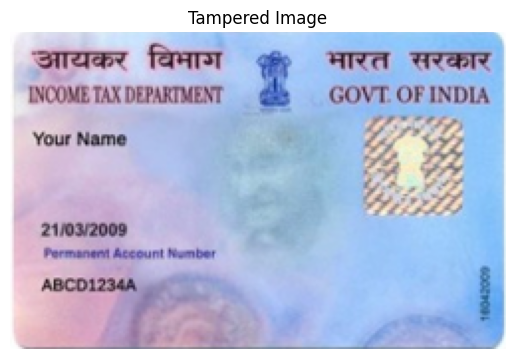

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:

# display the original image and the tampered image
plt.figure()
plt.imshow(original, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()
plt.figure()
plt.imshow(tampered, cmap='gray')
plt.title("Tampered Image")
plt.axis("off")
plt.show()
plt.figure()



In [22]:
# load 2 input images
original = cv2.imread("D:\Pan Card Tempering Detector App\PAN_Card_Tempering_Detector\images\original.png")
tampered = cv2.imread("D:\Pan Card Tempering Detector App\PAN_Card_Tempering_Detector\images\/tampered.png")

# convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

### Compute the Structural Similarity Index (SSIM)

In [23]:
(score, diff) = ssim(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


SSIM: 0.31686135690489126


### Calculate the threshold and contours


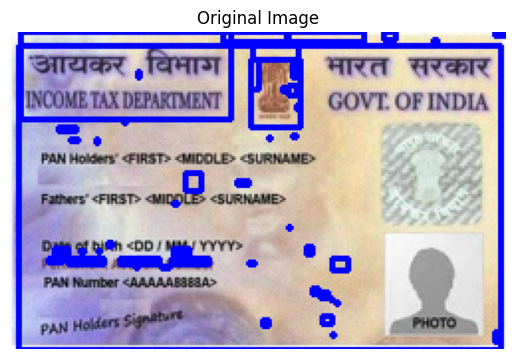

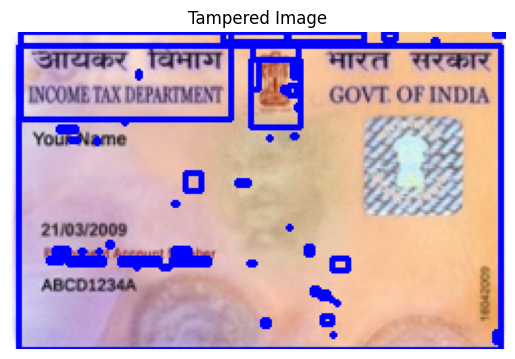

In [25]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

### Loop over the contours
for c in contours:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the original and tampered images  
plt.figure()
plt.imshow(original, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()
plt.figure()
plt.imshow(tampered, cmap='gray')
plt.title("Tampered Image")
plt.axis("off")
plt.show()

    

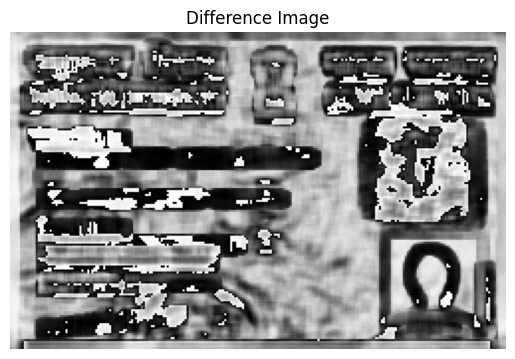

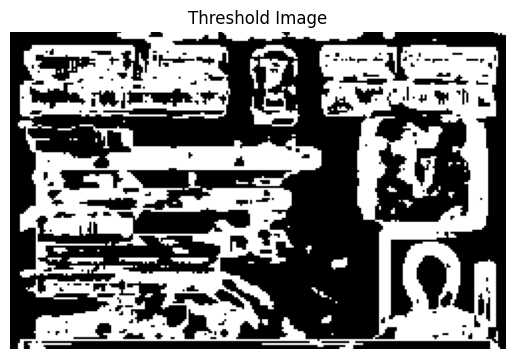

In [26]:
# Display the difference image, threshold image
plt.figure()
plt.imshow(diff, cmap='gray')
plt.title("Difference Image")
plt.axis("off")
plt.show()
plt.figure()
plt.imshow(thresh, cmap='gray')
plt.title("Threshold Image")
plt.axis("off")
plt.show()

### Conclusion

#### Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition. 
#### As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
#### Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  